In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import cv2
import matplotlib.pyplot as plt

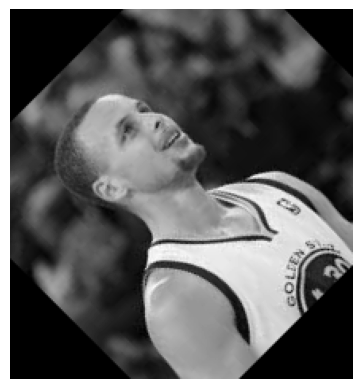

In [2]:
img=cv2.imread("/kaggle/input/stephc/steph.jpg",0)
h,w=img.shape

center=(w//2,h//2)
m=cv2.getRotationMatrix2D(center,45,1)
rot=cv2.warpAffine(img,m,(h,w))
plt.imshow(rot,cmap="gray")
plt.axis("off")
plt.show()

216

160000
74863
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 4, 5, 7, 8, 10, 11, 13, 15, 17, 18, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 33, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 39, 40, 40, 41, 41, 41, 42, 42, 43, 43, 44, 44, 45, 45, 46, 47, 47, 48, 49, 49, 50, 51, 51, 52, 53, 53, 54, 55, 56, 57, 58, 60, 61, 62, 63, 64, 66, 67, 69, 71, 73, 74, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 88, 89, 90, 91, 92, 93, 94, 94, 95, 96, 97, 98, 99, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 128, 129, 130, 132, 133, 135, 136, 138, 139, 141, 142, 144, 145, 147, 149, 150, 152, 153, 155, 156, 158, 159, 161, 162, 164, 165, 167, 168, 170, 172, 173, 175, 177, 178, 180, 182, 183, 185, 187, 189, 191, 193, 195, 196, 198, 199, 201, 202, 204, 205, 206, 207, 208, 208, 209, 209, 210, 210, 211, 211, 211, 211, 211, 211, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 213, 213, 213, 213, 213, 213, 213, 214, 

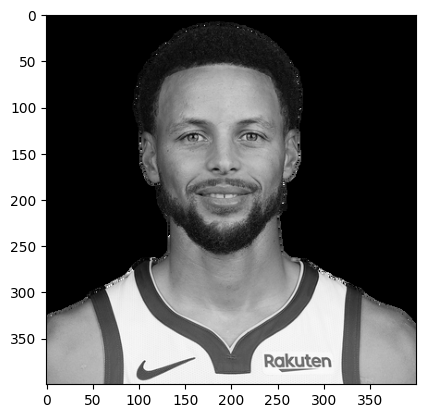

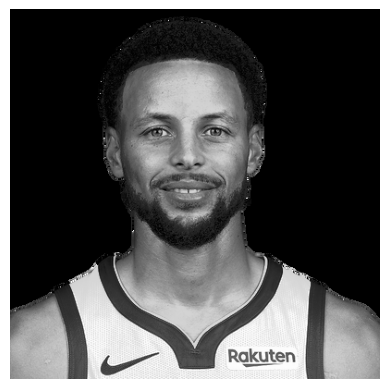

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread("steph.png", 0)
r, c = img.shape

# Step 1: Compute histogram
hist = [0]*256
for i in range(r):
    for j in range(c):
        hist[img[i,j]] += 1

# Step 2: Compute CDF
cdf = [0]*256
cdf[0] = hist[0]
for i in range(1,256):
    cdf[i] = cdf[i-1] + hist[i]
print(cdf[-1])

# Step 3: Normalize CDF to 0-(L-1)
L = 256  # number of intensity levels
cdf_min = min(x for x in cdf if x > 0)
print(cdf_min)
cdf_norm = [round((c - cdf_min)/(cdf[-1] - cdf_min) * (L-1)) for c in cdf]
print(cdf_norm)

# Step 4: Map original pixels using normalized CDF
eq = np.zeros_like(img, dtype=np.uint8)
for i in range(r):
    for j in range(c):
        eq[i,j] = cdf_norm[img[i,j]]

# Step 5: Display
plt.imshow(img, cmap="gray")
plt.show()
plt.imshow(eq, cmap="gray")
plt.axis("off")
plt.show()


In [6]:
img=cv2.resize(img,(256,256))

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read input and reference images (grayscale)
input_img = cv2.imread("/kaggle/input/stephc/steph.jpg", 0)
ref_img = cv2.imread("/kaggle/input/reference.jpg", 0)
r, c = input_img.shape

# ----------------------
# Step 1: Compute histograms
# ----------------------
hist_input = [0]*256
hist_ref = [0]*256

for i in range(r):
    for j in range(c):
        hist_input[input_img[i,j]] += 1
for i in range(ref_img.shape[0]):
    for j in range(ref_img.shape[1]):
        hist_ref[ref_img[i,j]] += 1

# ----------------------
# Step 2: Compute CDFs
# ----------------------
cdf_input = [0]*256
cdf_ref = [0]*256

cdf_input[0] = hist_input[0]
cdf_ref[0] = hist_ref[0]
for i in range(1,256):
    cdf_input[i] = cdf_input[i-1] + hist_input[i]
    cdf_ref[i] = cdf_ref[i-1] + hist_ref[i]

# Normalize CDFs to 0-255
cdf_input_norm = [round(c*255/cdf_input[-1]) for c in cdf_input]
cdf_ref_norm = [round(c*255/cdf_ref[-1]) for c in cdf_ref]

# ----------------------
# Step 3: Create mapping from input -> reference
# ----------------------
mapping = [0]*256
for i in range(256):
    diff = 255
    for j in range(256):
        if abs(cdf_input_norm[i]-cdf_ref_norm[j]) < diff:
            diff = abs(cdf_input_norm[i]-cdf_ref_norm[j])
            mapping[i] = j

# ----------------------
# Step 4: Apply mapping
# ----------------------
matched = np.zeros_like(input_img, dtype=np.uint8)
for i in range(r):
    for j in range(c):
        matched[i,j] = mapping[input_img[i,j]]

# ----------------------
# Step 5: Display
# ----------------------
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(input_img, cmap="gray")
plt.title("Input")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(ref_img, cmap="gray")
plt.title("Reference")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(matched, cmap="gray")
plt.title("Matched")
plt.axis("off")

plt.show()


[ WARN:0@17.587] global loadsave.cpp:268 findDecoder imread_('/kaggle/input/reference.jpg'): can't open/read file: check file path/integrity


AttributeError: 'NoneType' object has no attribute 'shape'

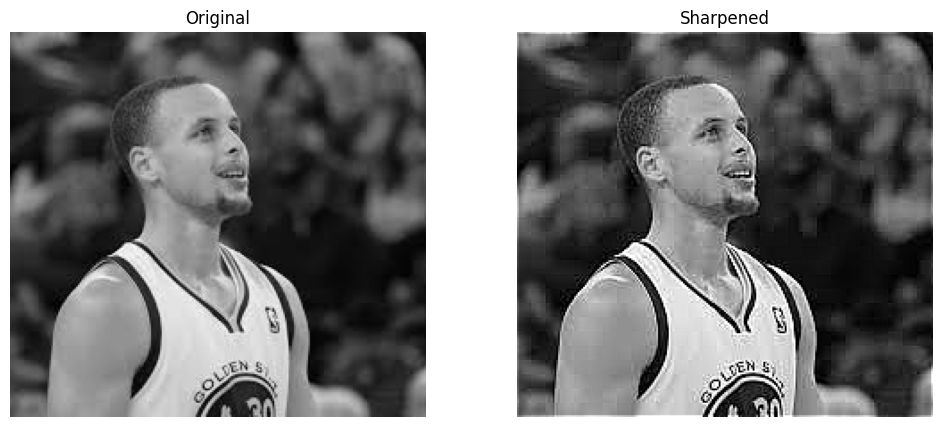

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read grayscale image
img = cv2.imread("/kaggle/input/stephc/steph.jpg", 0).astype(np.float32)

# Step 1: Apply simple box blur (3x3)
kernel = np.ones((3,3), dtype=np.float32) / 9
blurred = np.zeros_like(img)
r, c = img.shape

# Manual convolution
pad = 1
padded = np.pad(img, ((pad,pad),(pad,pad)), mode='constant')
for i in range(r):
    for j in range(c):
        region = padded[i:i+3, j:j+3]
        blurred[i,j] = np.sum(region * kernel)

# Step 2: Unsharp mask
alpha = 1.5
sharpened = img + alpha * (img - blurred)
sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

# Display
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis('off')
plt.subplot(1,2,2); plt.imshow(sharpened, cmap='gray'); plt.title("Sharpened"); plt.axis('off')
plt.show()


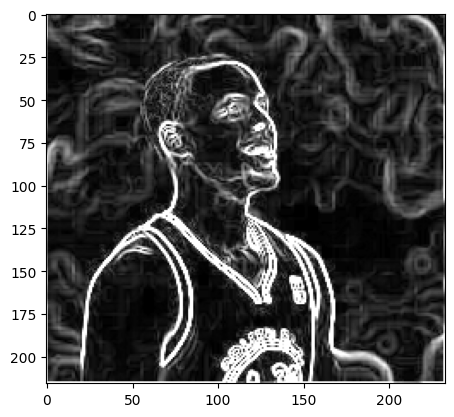

In [10]:
s_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

g_x=np.zeros_like(img)
g_y=np.zeros_like(img)
mag=np.zeros_like(img)

pad=np.pad(img,((1,1),(1,1)),mode='constant')
r,c=img.shape
for i in range(r):
    for j in range(c):
        region=pad[i:i+3,j:j+3]
        g_x[i,j]=np.sum(region*s_x)
        g_y[i,j]=np.sum(region*sobel_y)
        mag[i,j]=np.sqrt(g_x[i,j]**2+g_y[i,j]**2)
mag=np.clip(mag,0,255).astype(np.uint8)

plt.imshow(mag,cmap="gray")
plt.show()
        

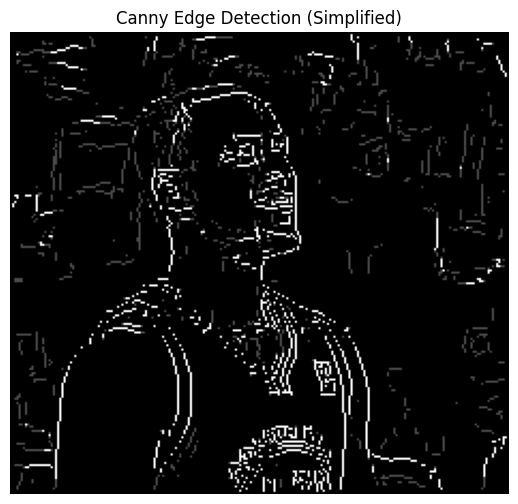

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Step 0: Read the image
# -----------------------------
img = cv2.imread("/kaggle/input/stephc/steph.jpg", 0).astype(np.float32)
r, c = img.shape

# -----------------------------
# Step 1: Gaussian smoothing (3x3)
# -----------------------------
kernel_gauss = np.array([[1,2,1],
                         [2,4,2],
                         [1,2,1]], dtype=np.float32)/16

def convolve(img, kernel):
    k = kernel.shape[0]//2
    padded = np.pad(img, ((k,k),(k,k)), mode='constant')
    out = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            out[i,j] = np.sum(region * kernel)
    return out

smoothed = convolve(img, kernel_gauss)

# -----------------------------
# Step 2: Compute gradients (Sobel)
# -----------------------------
sobel_x = np.array([[-1,0,1],
                    [-2,0,2],
                    [-1,0,1]], dtype=np.float32)
sobel_y = np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]], dtype=np.float32)

grad_x = convolve(smoothed, sobel_x)
grad_y = convolve(smoothed, sobel_y)

mag = np.sqrt(grad_x**2 + grad_y**2)
theta = np.arctan2(grad_y, grad_x) * (180/np.pi)
theta[theta < 0] += 180  # convert negative angles to positive

# -----------------------------
# Step 3: Non-maximum suppression
# -----------------------------
nms = np.zeros_like(mag)
for i in range(1,r-1):
    for j in range(1,c-1):
        angle = theta[i,j]
        q = 255
        r1 = 255
        # 0 degrees
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            q = mag[i, j+1]
            r1 = mag[i, j-1]
        # 45 degrees
        elif 22.5 <= angle < 67.5:
            q = mag[i+1, j-1]
            r1 = mag[i-1, j+1]
        # 90 degrees
        elif 67.5 <= angle < 112.5:
            q = mag[i+1, j]
            r1 = mag[i-1, j]
        # 135 degrees
        elif 112.5 <= angle < 157.5:
            q = mag[i-1, j-1]
            r1 = mag[i+1, j+1]
        if mag[i,j] >= q and mag[i,j] >= r1:
            nms[i,j] = mag[i,j]
        else:
            nms[i,j] = 0

# -----------------------------
# Step 4: Double thresholding
# -----------------------------
high = 100
low = 50
canny_edges = np.zeros_like(nms)
strong = 255
weak = 75

canny_edges[nms >= high] = strong
canny_edges[(nms >= low) & (nms < high)] = weak

# -----------------------------
# Step 5: Display the result
# -----------------------------
plt.figure(figsize=(10,6))
plt.imshow(canny_edges, cmap='gray')
plt.title("Canny Edge Detection (Simplified)")
plt.axis('off')
plt.show()


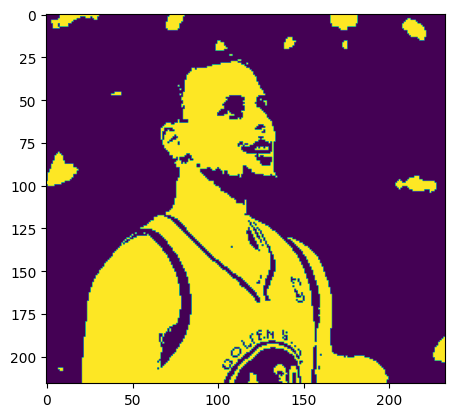

In [13]:
binary=np.zeros_like(img)
threshold=127
r,c=img.shape
for i in range(r):
    for j in range(c):
        if img[i,j]>=threshold:
            binary[i,j]=255
        else:
            binary[i,j]=0
plt.imshow(binary)
plt.show()
            

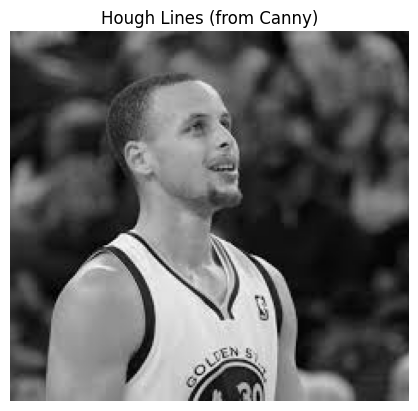

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# read grayscale image
img = cv2.imread("/kaggle/input/stephc/steph.jpg",0)

# ---- CHANGE: use Canny edges instead of using a binary image ----
edges = cv2.Canny(img, 100, 200)   # low_thresh=100, high_thresh=200

r, c = edges.shape

# Accumulator dimensions
theta_max = 180
diag_len = int(np.ceil(np.sqrt(r**2 + c**2)))           # max possible |rho|
accumulator = np.zeros((2*diag_len, theta_max), dtype=np.uint64)

for i in range(r):
    for j in range(c):
        if edges[i, j] > 0:                             # only vote for edge pixels
            for theta in range(theta_max):
                theta_rad = math.radians(theta)
                rho = int(j * math.cos(theta_rad) + i * math.sin(theta_rad)) + diag_len
                accumulator[rho, theta] += 1

# Find peaks (simple thresholding on votes)
threshold = 100
rhos, thetas = np.where(accumulator > threshold)

# Draw detected lines on a color copy of the image
line_img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for rho, theta in zip(rhos, thetas):
    theta_rad = math.radians(theta)
    a = math.cos(theta_rad)
    b = math.sin(theta_rad)

    # convert back from accumulator index to actual rho:
    # note: during voting we did "+ diag_len", so subtract it here by factoring:
    x0 = a * rho - diag_len * a
    y0 = b * rho - diag_len * b

    # pick two far-away points on the line for drawing
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv2.line(line_img, (x1, y1), (x2, y2), (0, 0, 255), 1)

# display (convert BGR->RGB for matplotlib)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Lines (from Canny)")
plt.axis('off')
plt.show()


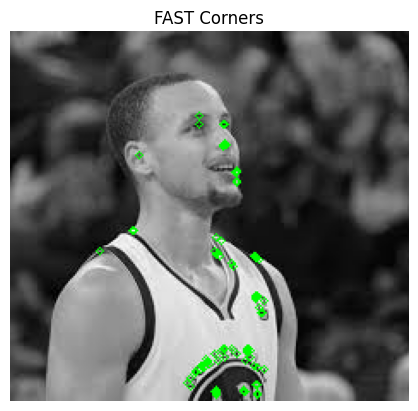

In [37]:
# FAST: manual implementation
def fast_detector(img, threshold=40, n=12):
    r, c = img.shape
    corners = []

    # Circle of 16 points (radius = 3)
    circle = [(0,3),(1,3),(2,2),(3,1),(3,0),(3,-1),(2,-2),(1,-3),
              (0,-3),(-1,-3),(-2,-2),(-3,-1),(-3,0),(-3,1),(-2,2),(-1,3)]
    
    for i in range(3, r-3):
        for j in range(3, c-3):
            Ip = img[i,j]
            bright = dark = 0
            for dx,dy in circle:
                if img[i+dy, j+dx] >= Ip + threshold:
                    bright += 1
                    dark = 0
                elif img[i+dy, j+dx] <= Ip - threshold:
                    dark += 1
                    bright = 0
                else:
                    bright = dark = 0
                if bright >= n or dark >= n:
                    corners.append((j,i))
                    break
    return corners

# Run FAST
fast_pts = fast_detector(img)

# Draw results
out2 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for x,y in fast_pts:
    cv2.circle(out2, (x,y), 2, (0,255,0))

plt.imshow(out2)
plt.title("FAST Corners")
plt.axis("off")
plt.show()


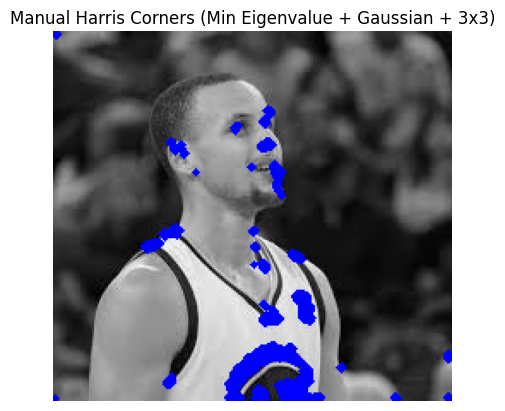

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Read grayscale image
# -----------------------------
img = cv2.imread("/kaggle/input/stephc/steph.jpg", 0)
r, c = img.shape

# Pad image (1 pixel for Sobel)
padded = np.pad(img, ((1,1),(1,1)), mode='constant')

# -----------------------------
# 2. Define Sobel filters
# -----------------------------
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1,-2,-1],
                    [ 0, 0, 0],
                    [ 1, 2, 1]])

# -----------------------------
# 3. Compute image gradients manually
# -----------------------------
Ix = np.zeros_like(img, dtype=np.float64)
Iy = np.zeros_like(img, dtype=np.float64)

for i in range(r):
    for j in range(c):
        region = padded[i:i+3, j:j+3]
        Ix[i,j] = np.sum(region * sobel_x)
        Iy[i,j] = np.sum(region * sobel_y)

# -----------------------------
# 4. Gradient products
# -----------------------------
Ix2 = Ix * Ix
Iy2 = Iy * Iy
Ixy = Ix * Iy

# -----------------------------
# 5. Manual Gaussian blur (3x3 kernel)
# -----------------------------
gaussian_kernel = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]], dtype=np.float64) / 16

def manual_gaussian_blur(img, kernel):
    pad_size = kernel.shape[0] // 2
    padded_img = np.pad(img, ((pad_size, pad_size),(pad_size, pad_size)), mode='constant')
    blurred = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = padded_img[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            blurred[i,j] = np.sum(region * kernel)
    return blurred

Sx2 = manual_gaussian_blur(Ix2, gaussian_kernel)
Sy2 = manual_gaussian_blur(Iy2, gaussian_kernel)
Sxy = manual_gaussian_blur(Ixy, gaussian_kernel)

# -----------------------------
# 6. Compute corners using 3x3 neighborhood + min eigenvalue
# -----------------------------
corners = []
threshold = 1e5  # adjust as needed

for i in range(1, r-1):
    for j in range(1, c-1):
        # Sum over 3x3 neighborhood
        Sx2_sum = np.sum(Sx2[i-1:i+2, j-1:j+2])
        Sy2_sum = np.sum(Sy2[i-1:i+2, j-1:j+2])
        Sxy_sum = np.sum(Sxy[i-1:i+2, j-1:j+2])

        # Structure tensor M
        M = np.array([[Sx2_sum, Sxy_sum],
                      [Sxy_sum, Sy2_sum]])

        # Minimum eigenvalue
        eigvals = np.linalg.eigvals(M)
        if np.min(eigvals) > threshold:
            corners.append((j,i))

# -----------------------------
# 7. Visualization
# -----------------------------
out = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for x,y in corners:
    cv2.circle(out, (x,y), 2, (0,0,255), -1)

plt.imshow(out)
plt.title("Manual Harris Corners (Min Eigenvalue + Gaussian + 3x3)")
plt.axis("off")
plt.show()


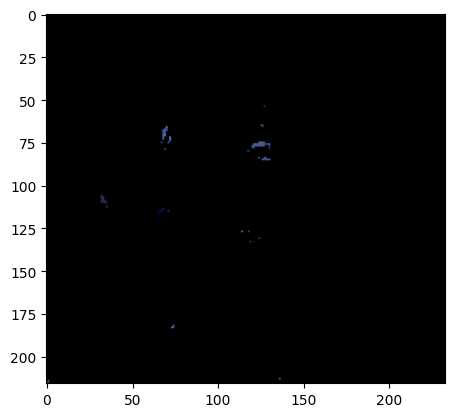

In [35]:
img=cv2.imread("/kaggle/input/stephc/steph.jpg")
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
l=np.array([0,120,70])
u=np.array([10,255,255])
mask=cv2.inRange(hsv,l,u)
res=cv2.bitwise_and(img,img,mask=mask)

plt.imshow(res,cmap="gray")
plt.show()

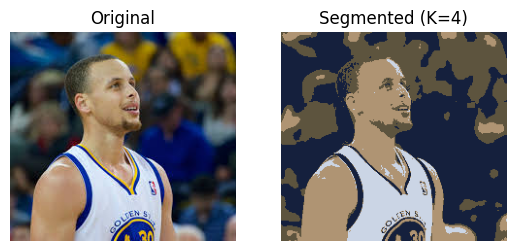

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# ---- Step 1: Read image ----
img = imread("/kaggle/input/stephc/steph.jpg")   # shape (h,w,3)
pixels = img.reshape(-1, 3)                      # (num_pixels, 3)

# ---- Step 2: KMeans function ----
def kmeans(X, K, max_iters=20):
    np.random.seed(0)
    centroids = X[np.random.choice(len(X), K, replace=False)]

    for _ in range(max_iters):
        # assign each point to nearest centroid
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # update centroids
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # stop if converged
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return centroids, labels

# ---- Step 3: Run KMeans ----
K = 4   # number of colors
centroids, labels = kmeans(pixels, K)

# ---- Step 4: Reconstruct segmented image ----
segmented_pixels = centroids[labels].astype(np.uint8)
segmented_img = segmented_pixels.reshape(img.shape)

# ---- Step 5: Show result ----
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(segmented_img)
plt.title(f"Segmented (K={K})")
plt.axis("off")
plt.show()


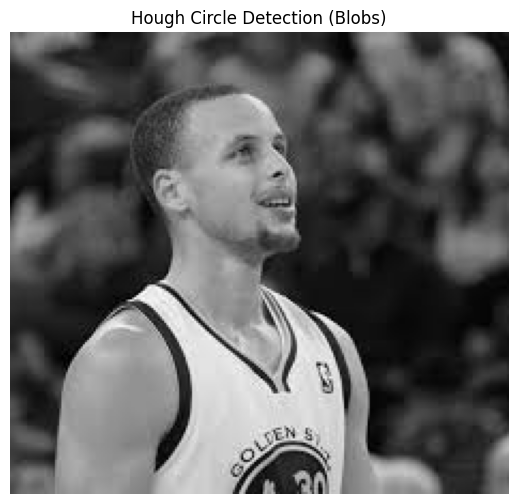

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

# Read image
img = cv2.imread("/kaggle/input/stephc/steph.jpg", 0)
r, c = img.shape

# Step 1: Detect edges (use your canny_edges from before)
edges = cv2.Canny(img, 100, 200)  # or replace with your manual Canny output

# Step 2: Hough circle accumulator
max_radius = min(r, c) // 4   # limit radius size
acc = np.zeros((r, c, max_radius), dtype=np.uint64)

for y in range(r):
    for x in range(c):
        if edges[y, x] > 0:  # edge pixel
            for radius in range(15, max_radius, 2):  # loop over possible radii
                for angle in range(0, 360, 5):      # loop over circle angles
                    t = math.radians(angle)
                    a = int(x - radius * math.cos(t))
                    b = int(y - radius * math.sin(t))
                    if 0 <= a < c and 0 <= b < r:
                        acc[b, a, radius] += 1

# Step 3: Find peaks in accumulator
threshold = 100
circles = np.argwhere(acc > threshold)  # (y, x, radius)

# Step 4: Draw circles
res = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for y, x, radius in circles:
    cv2.circle(res, (x, y), radius, (0, 255, 0), 2)

plt.figure(figsize=(10,6))
plt.imshow(res)
plt.title("Hough Circle Detection (Blobs)")
plt.axis('off')
plt.show()
